In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [104]:
data = pd.read_csv(r"C:\Users\dagma\Documents\Internship-Data-Engineering-take-home-assignment\weather_data.csv")
data.head

<bound method NDFrame.head of           date      city  temperature_celsius  humidity_percent  \
0   2023-01-01  New York                  5.0              60.0   
1   01/02/2023  New York                  NaN              65.0   
2   03-01-2023  New York                  7.0               NaN   
3          NaN    London                  8.0              70.0   
4   2023-01-02    London                  6.0              75.0   
..         ...       ...                  ...               ...   
95  01-01-2023    London                  NaN               NaN   
96  09-01-2023    London                  NaN               NaN   
97  2023-01-11     Tokyo                  NaN               NaN   
98  15/01/2023  New York                  NaN              41.0   
99  01/12/2023    London                 13.7              41.0   

    wind_speed_kph weather_condition  
0             10.0             Sunny  
1             12.0            Cloudy  
2              8.0             Rainy  
3        

In [105]:
print(data.isnull().sum())

date                   20
city                    0
temperature_celsius    58
humidity_percent       53
wind_speed_kph         45
weather_condition      16
dtype: int64


In [106]:
colum_replace = ['temperature_celsius', 'humidity_percent', 'wind_speed_kph']
for col in colum_replace:
    data[col] = data[col].fillna(data[col].mean())

In [107]:
print(data.isnull().sum())

date                   20
city                    0
temperature_celsius     0
humidity_percent        0
wind_speed_kph          0
weather_condition      16
dtype: int64


In [108]:
data = data.dropna(subset=['date'])

In [109]:
print(data.isnull().sum())

date                    0
city                    0
temperature_celsius     0
humidity_percent        0
wind_speed_kph          0
weather_condition      12
dtype: int64


In [111]:
data['date'] = data['date'].astype(str).str.replace(r'[-/.]', '-', regex=True)

C:\Users\dagma\AppData\Local\Temp\ipykernel_5780\486494807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].astype(str).str.replace(r'[-/.]', '-', regex=True)


In [128]:
def convert_date(date_str):
    formats = ['%d-%m-%Y', '%m-%d-%Y', '%Y-%m-%d']
    for frmt in formats:
        try:
            return datetime.strptime(date_str, frmt)
        except:
            continue
    return pd.NaT

In [129]:
data['date'] = data['date'].apply(convert_date)
data = data[data['date'].notna()]

C:\Users\dagma\AppData\Local\Temp\ipykernel_5780\652334585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].apply(convert_date)


In [130]:
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

In [117]:
data['temperature_fahrenheit'] = data['temperature_celsius'] * 9/5 + 32

In [132]:
data = data[(data['weather_condition'].notna()) & (data['weather_condition'] != 'Unknown')]

In [133]:
print(data.isnull().sum())

date                      0
city                      0
temperature_celsius       0
humidity_percent          0
wind_speed_kph            0
weather_condition         0
temperature_fahrenheit    0
dtype: int64


In [134]:
import os
data.to_csv(r'C:\Users\dagma\Documents\Internship-Data-Engineering-take-home-assignment\cleaned_weather_data.csv', index=False)
data.to_json(r'C:\Users\dagma\Documents\Internship-Data-Engineering-take-home-assignment\cleaned_weather_data.json', orient='records', lines=True)

In [135]:
top5_cities = data.groupby('city')['temperature_celsius'].nlargest(5)

with open(r'C:\Users\dagma\Documents\Internship-Data-Engineering-take-home-assignment\top_5_cities_by_temperature.txt', 'w') as file:
    file.write("Top 5 Cities by Temperature celsius :\n\n")
    for city, temp in top5_cities.items():
        file.write(f"{city}: {temp:.2f} °C\n")


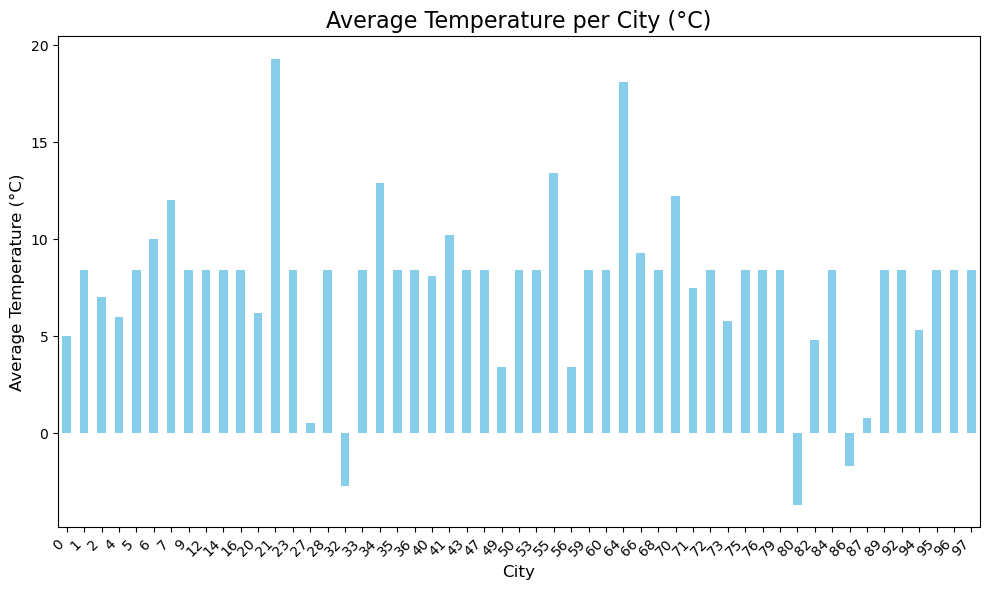

In [136]:
plt.figure(figsize=(10,6))
data['temperature_celsius'].plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Average Temperature per City (°C)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate city names for readability
plt.tight_layout()  # Fit everything nicely

plt.savefig(r'C:\Users\dagma\Documents\Internship-Data-Engineering-take-home-assignment\average_temperature_per_city.png')

plt.show()
